In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
def calculate_shannon_diversity(sad):

    relative_sad = sad / sum(sad)

    shannon_diversity = -1*sum(relative_sad*np.log(relative_sad) )

    return shannon_diversity

In [3]:
samples=os.listdir("/u/scratch/r/rwolff/strainFinder/strainFinder_output/frequencies")

In [4]:
specs_list = []
for sample in samples:
    df = pd.read_csv(f"/u/project/ngarud/Garud_lab/metagenomic_fastq_files/HMP1-2/midas_output/{sample}/species/species_profile.txt",sep="\t", index_col=0)
    x=df["count_reads"]
    counts = df[x>1]["count_reads"]
    file=f"/u/scratch/r/rwolff/strainFinder/strainFinder_output/frequencies/{sample}"
    specs = []
    for species in counts.index:
        if os.path.isfile(f"{file}/{species}"):
            s = np.array(np.genfromtxt(f"{file}/{species}"))
        
            y = counts.loc[species]*s
            if type(y) == np.ndarray:
                specs.extend(y)
            else:
                specs.append(y)
        else:
            specs.append(counts.loc[species])
    specs_list.append(sorted(specs)[::-1])
    #print(sample)    df = pd.read_csv(f"/u/project/ngarud/Garud_lab/metagenomic_fastq_files/HMP1-2/midas_output/{sample}/species/species_profile.txt",sep="\t", index_col=0)


In [16]:
shannon_divs = [calculate_shannon_diversity(sad) for sad in specs_list]

In [17]:
richness = [int(len(sad)) for sad in specs_list]

In [18]:
X = np.array([shannon_divs,richness])

In [19]:
shannon_divs = pd.DataFrame(X.T,columns=['shannon_diversity',"strain_richness"])

In [22]:
shannon_divs.index = samples

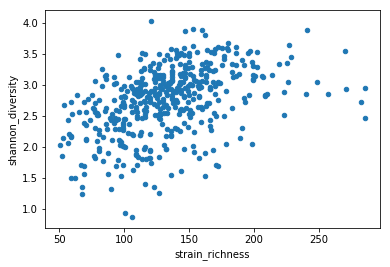

In [30]:
shannon_divs.plot.scatter(y='shannon_diversity',x="strain_richness")

In [24]:
shannon_divs.to_csv("diversity_richness_strains")